In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import os
HOME = os.getcwd()

print(HOME)

/content


Downloading yolov9 model

In [ ]:
!git clone https://github.com/WongKinYiu/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 654, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 654 (delta 15), reused 1 (delta 0), pack-reused 621
Receiving objects: 100% (654/654), 3.24 MiB | 30.99 MiB/s, done.
Resolving deltas: 100% (254/254), done.
/content/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 95.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
   

In [ ]:
!pip install -q roboflow

Downloading the pre-trained weights of the model
- Includes yolov9 and gelan

In [ ]:
import roboflow

from IPython.display import Image

In [ ]:
!mkdir -p {HOME}/weights

!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!ls -la {HOME}/weights

total 402440
drwxr-xr-x 2 root root      4096 Apr  8 03:52 .
drwxr-xr-x 1 root root      4096 Apr  8 03:52 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt


Downloading the custom dataset we made on roboflow (Link to the Roboflow project below)
- https://universe.roboflow.com/machine-learning-project-5zutf/ml-project-bjexr
- Data was manually annotated by the team
- The dataset contained a total of 119 images but was expanded to 263 images because some were generated images by roboflow that we were blurred and had noise added to them to create even more image examples (this could generate even more images for us up to 1000 but that's part of the paid service of roboflow)

In [ ]:
#This code comes directly from Roboflow
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="rx2fvosKv5Jb3WtnevD4")
project = rf.workspace("machine-learning-project-5zutf").project("ml-project-bjexr")
version = project.version(1)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ML-Project-1 in yolov9:: 100%|██████████| 538/538 [00:00<00:00, 5989.43it/s]


Creating the model

In [ ]:
#Creates the model with the train_dual.py which is for yolov9 model, while train.py is for the gelan model
%cd {HOME}/yolov9

!python train_dual.py \
--batch 10 --epochs 10 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/yolov9/ML-Project-1/data.yaml \
--weights /content/weights/yolov9-c.pt \
--cfg models/detect/yolov9-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-04-08 03:54:48.246863: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-08 03:54:48.246917: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-08 03:54:48.358347: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-08 03:54:49.603413: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train_dual: weights=/content/weights/yolov9-c.pt, cfg=models/detect/yolov9-c.yaml, data=/content/yolov9/ML-Project-1/data.yaml, hyp=hyp.scratch-high.yaml, epochs=10, batch_size=10, imgsz=640, rect=False, resume=False, nosave=

In [ ]:
!ls {HOME}/yolov9/runs/train/exp/

confusion_matrix.png				    P_curve.png       train_batch2.jpg
events.out.tfevents.1712548490.11467ae2a717.5897.0  PR_curve.png      val_batch0_labels.jpg
F1_curve.png					    R_curve.png       val_batch0_pred.jpg
hyp.yaml					    results.csv       val_batch1_labels.jpg
labels_correlogram.jpg				    results.png       val_batch1_pred.jpg
labels.jpg					    train_batch0.jpg  weights
opt.yaml					    train_batch1.jpg


Statistics of Results
- This is the results of our model on the training set, through 10 epochs
- Our mAP50 is 0.38, this low number is due to the difference in the classes which is drastically lowering the number
  - For example, mAP50 of cars (which has the highest amount) is 0.705, while
trucks is only 0.354 and busses are 0.082
- One of the ways, we could've have reduced this was to find better cameras with more exposure to the other classes

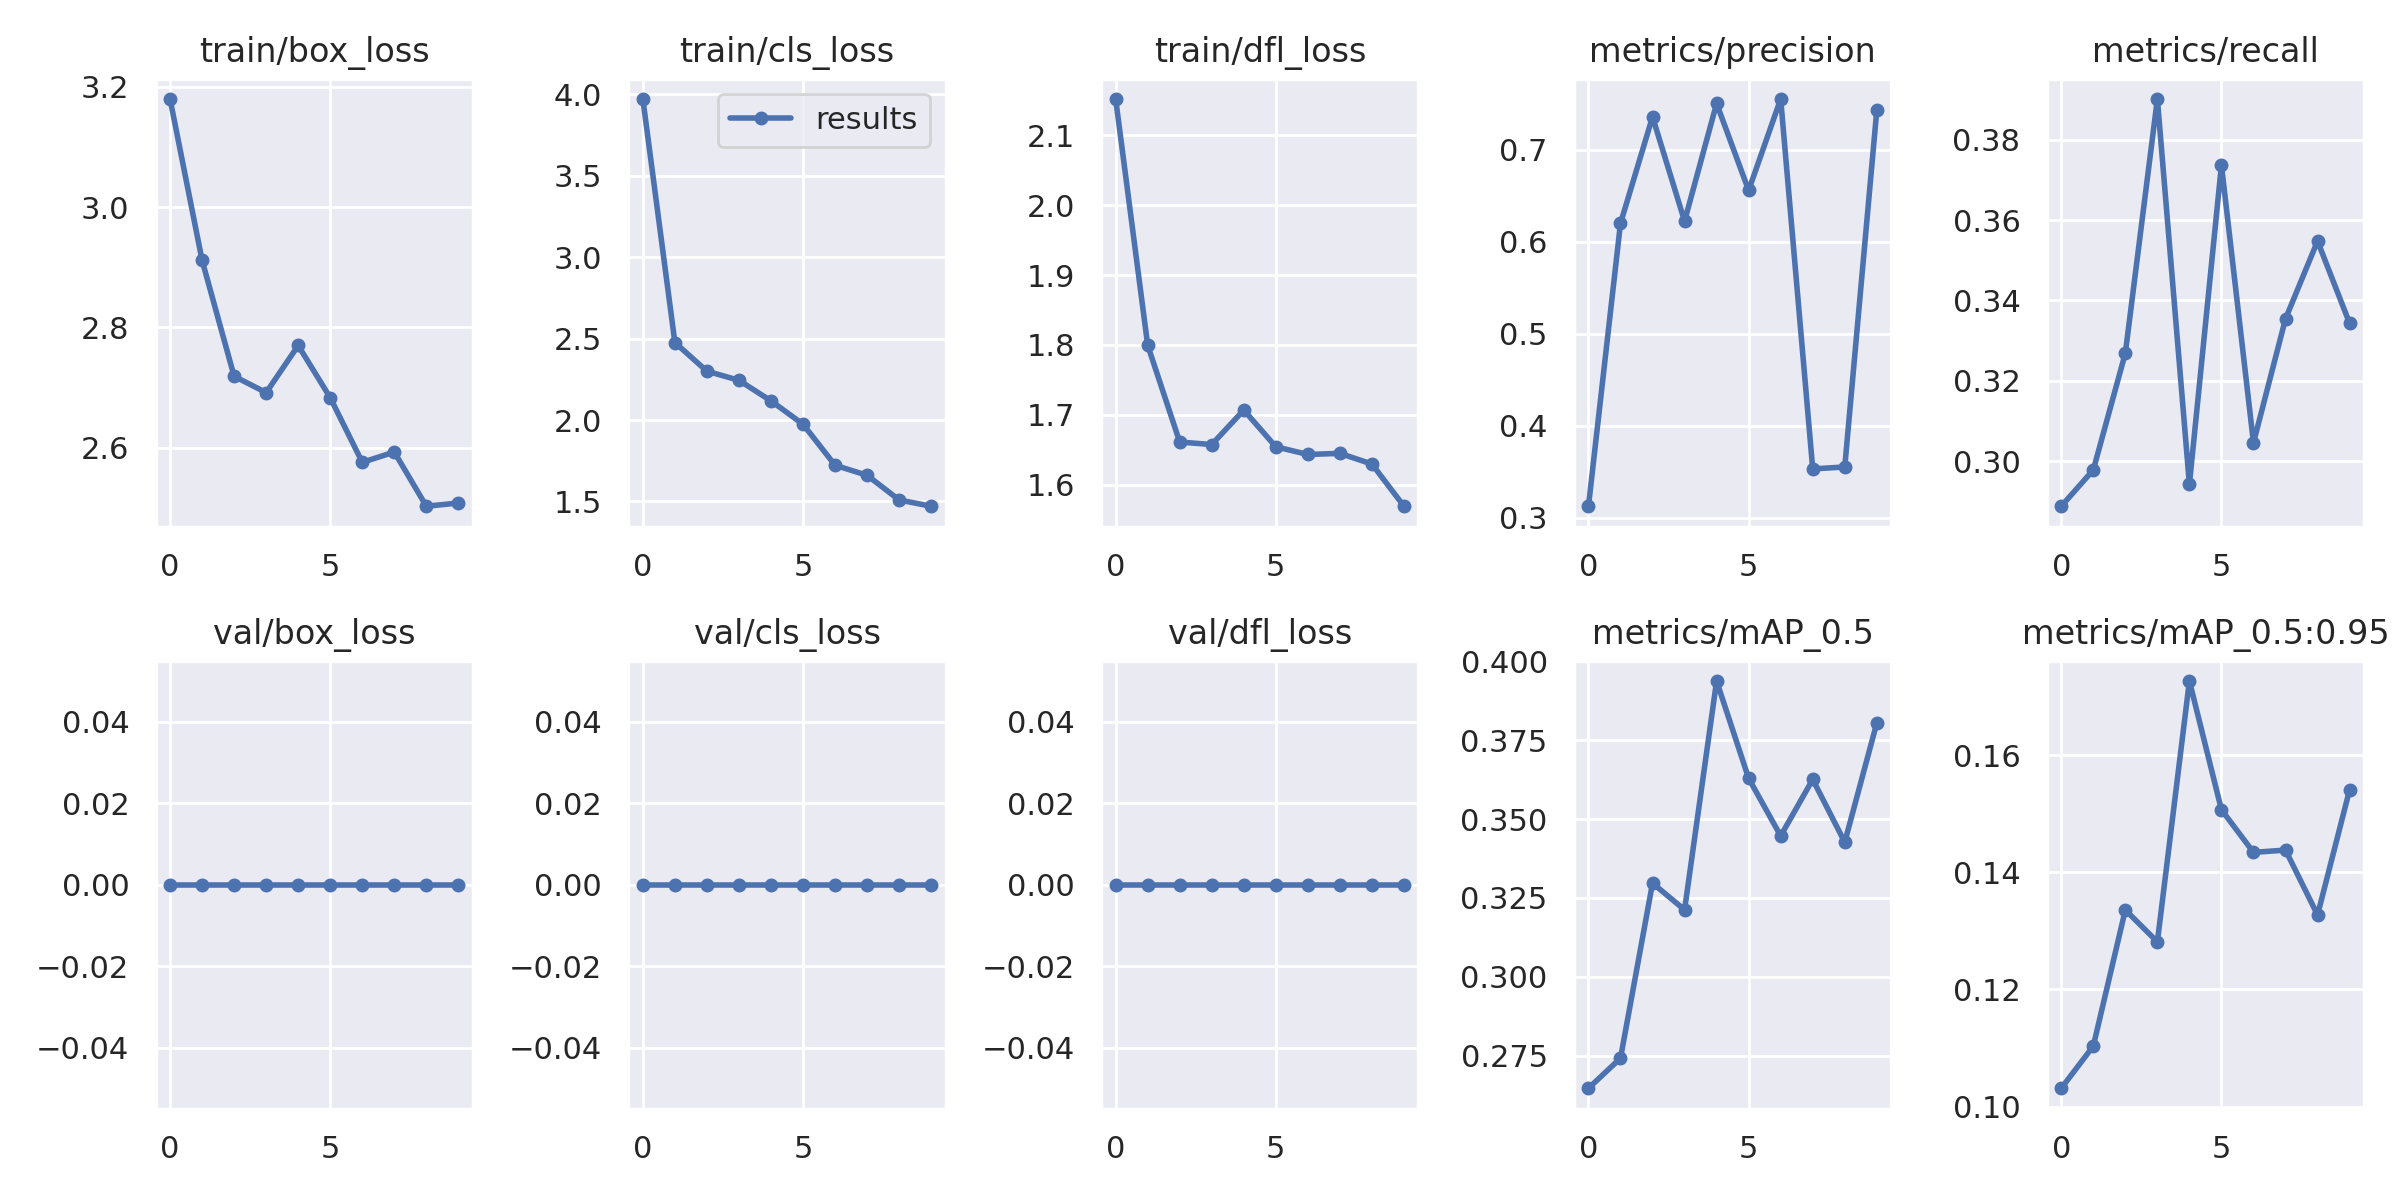

In [ ]:
Image(filename=f"/content/yolov9/runs/train/exp/results.png", width=1000)

Confusion Matrix

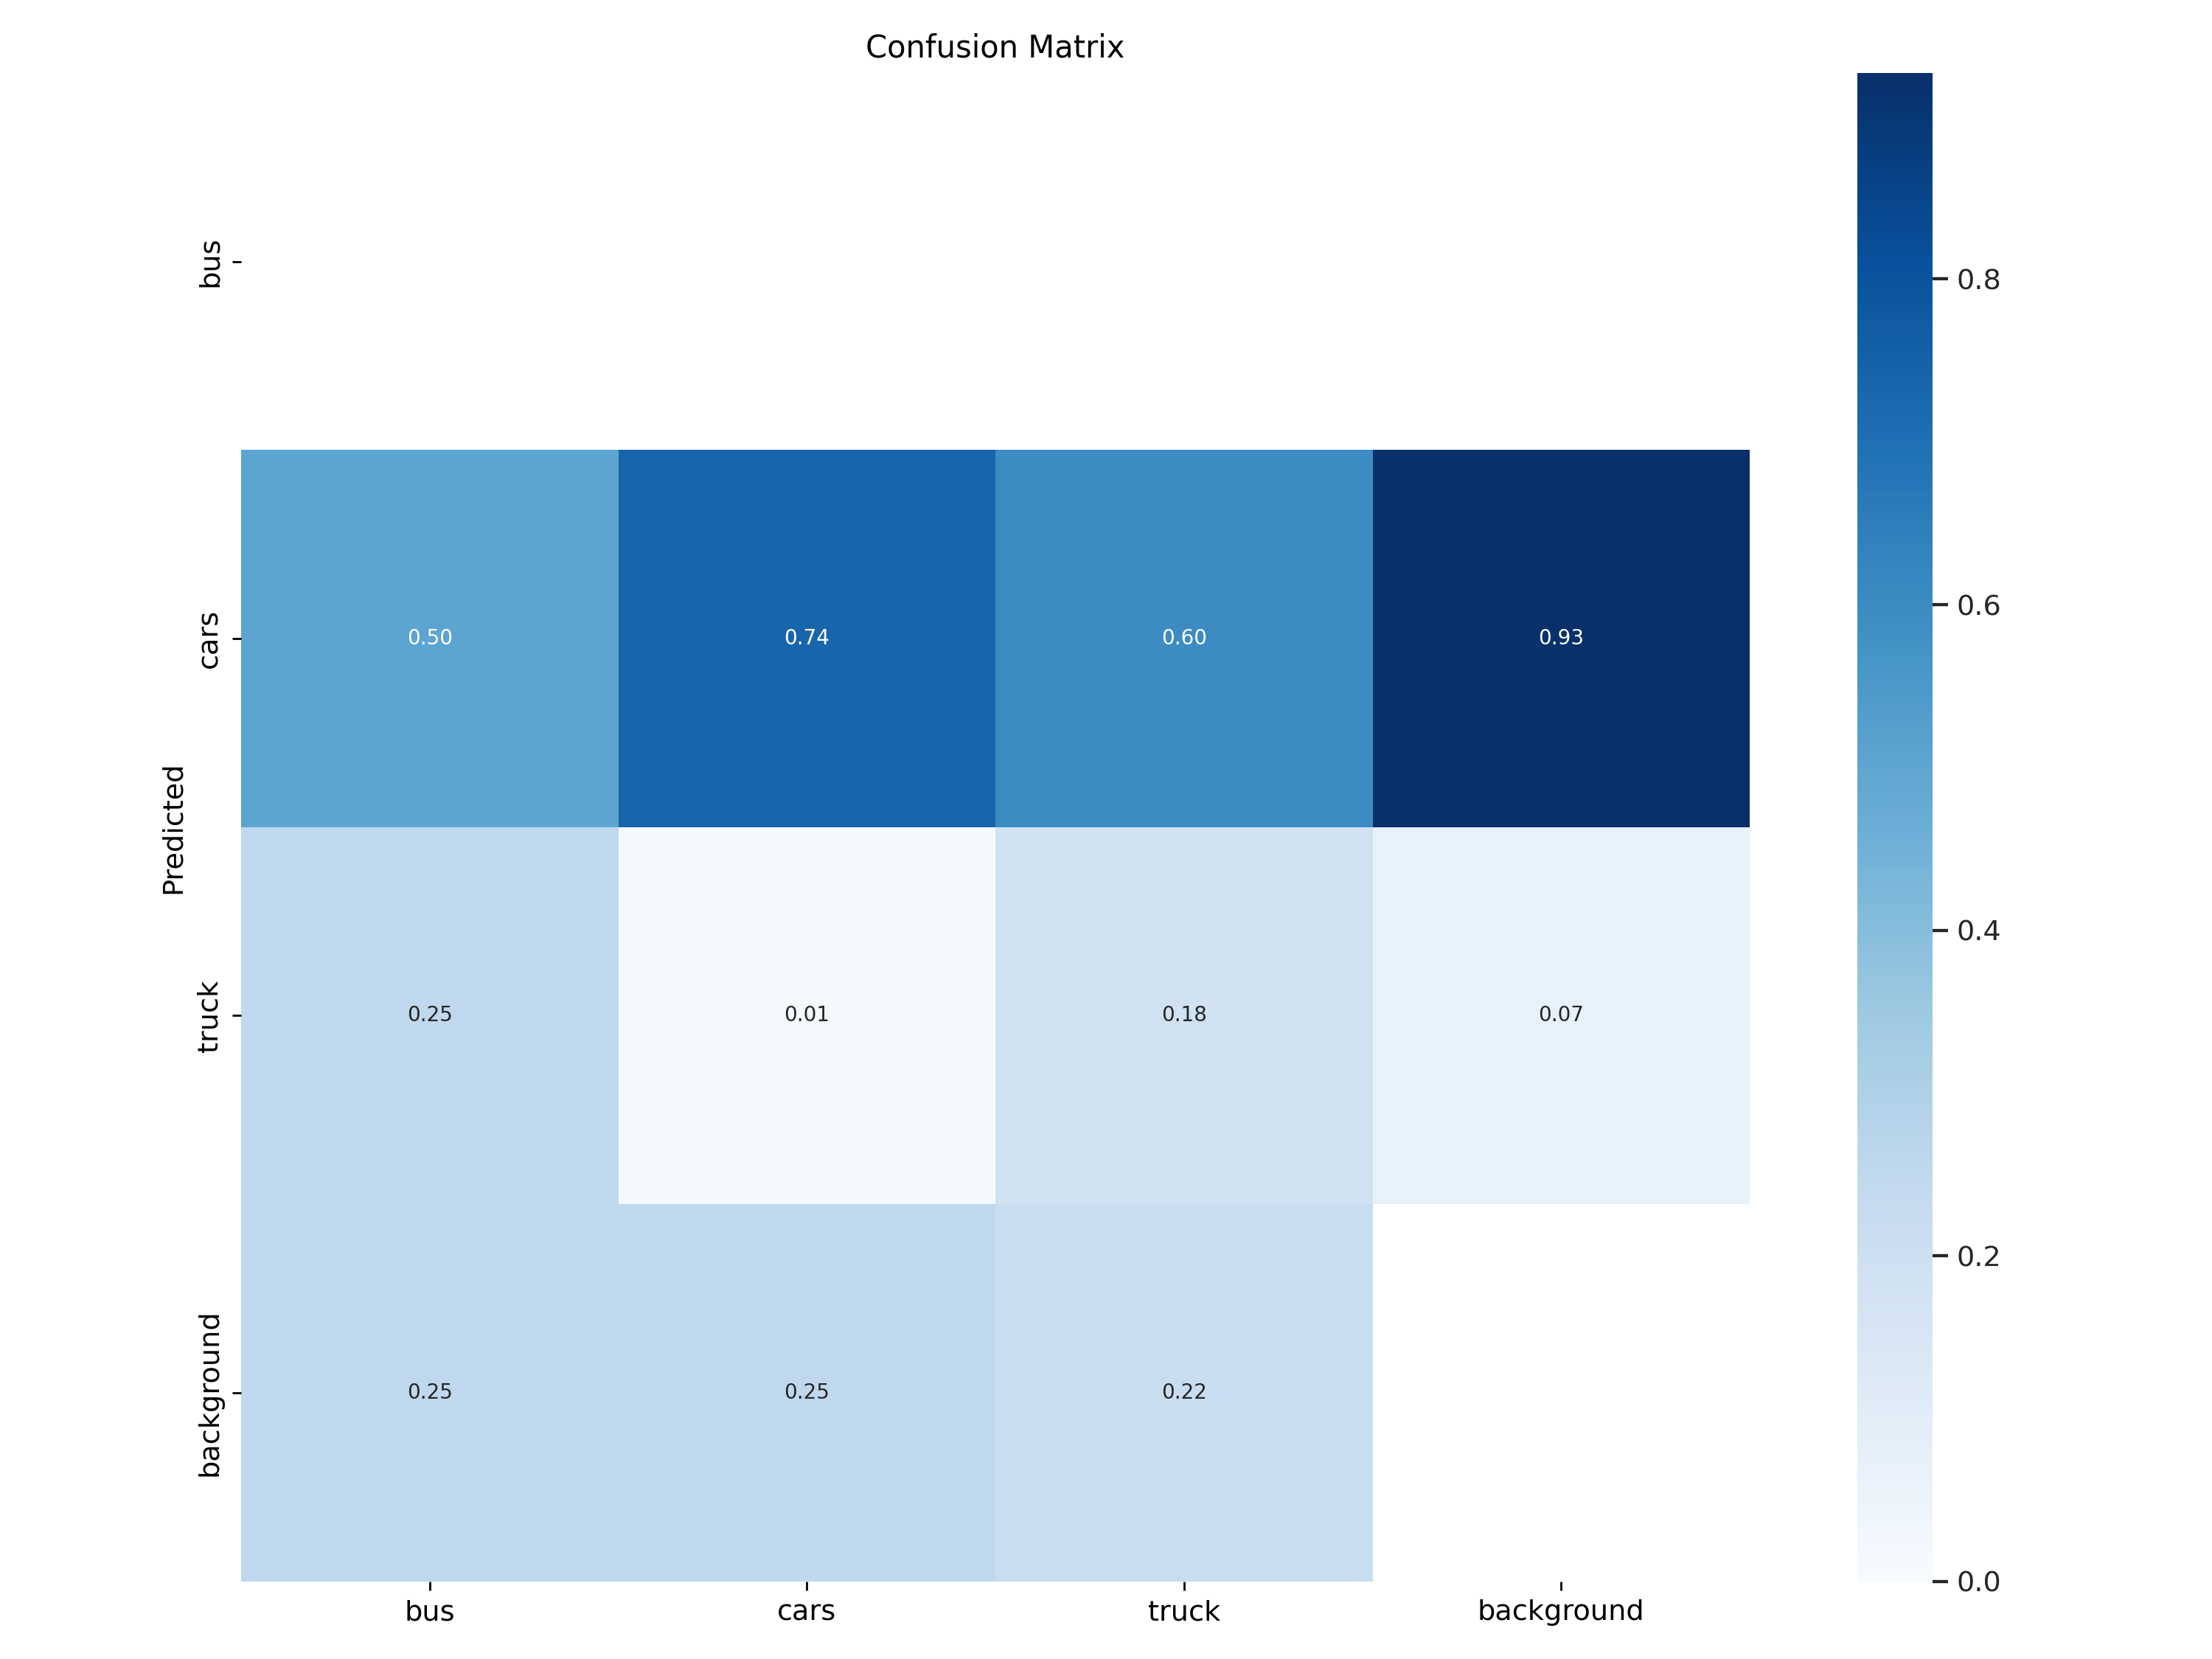

In [ ]:
Image(filename=f"/content/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

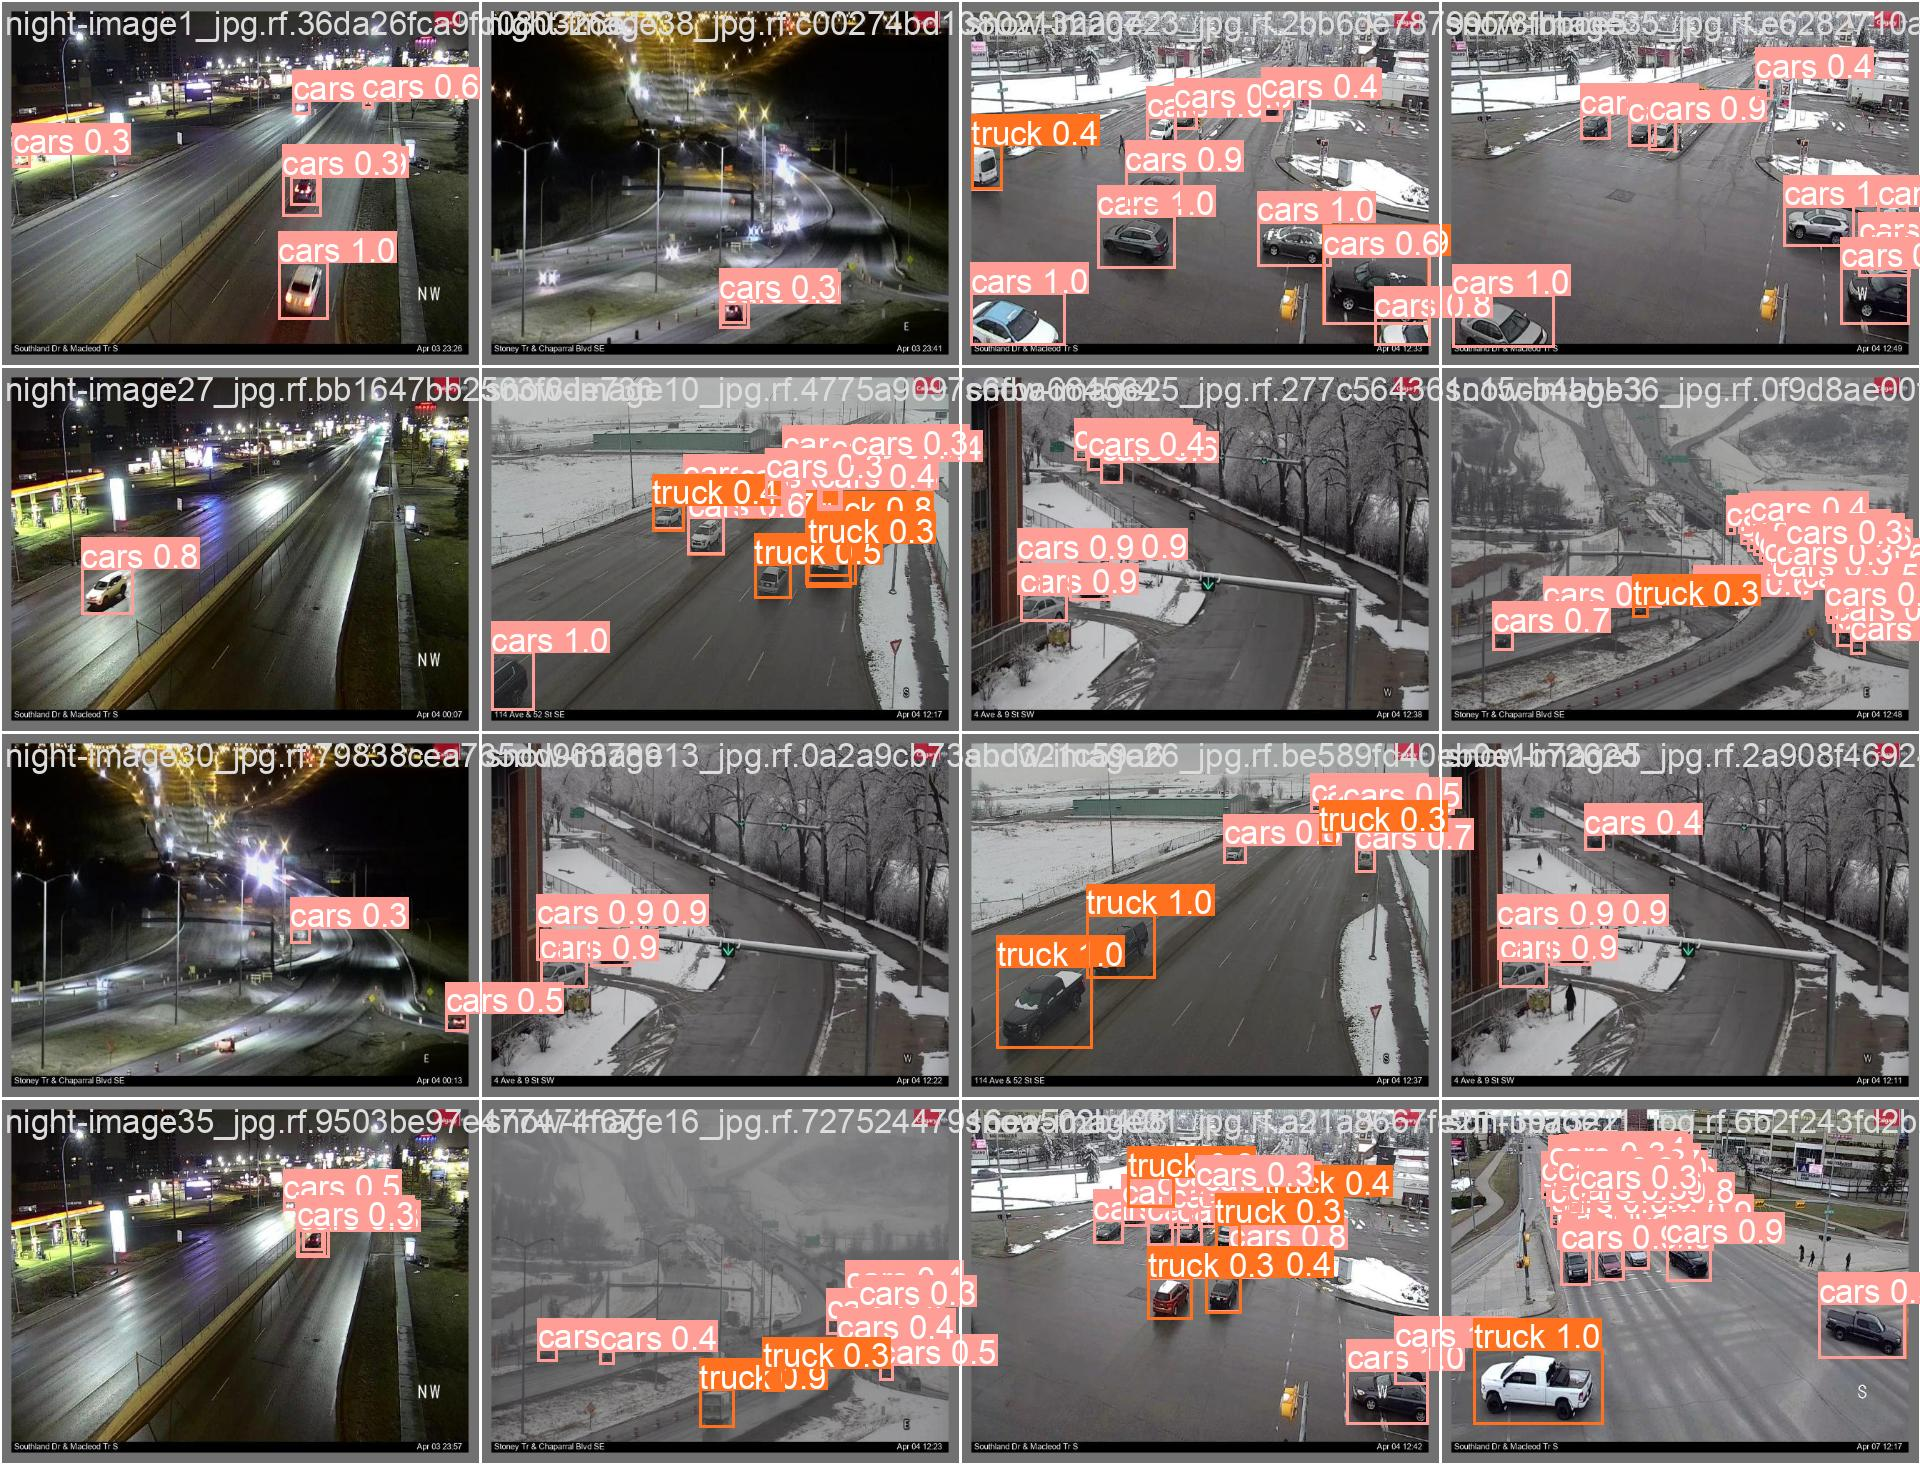

In [ ]:
Image(filename=f"/content/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

In [ ]:
%cd {HOME}/yolov9

!python val_dual.py \
--img 640 --batch 8 --conf 0.001 --iou 0.7 --device 0 \
--data /content/yolov9/ML-Project-1/data.yaml \
--weights /content/yolov9/runs/train/exp/weights/best.pt

/content/yolov9
val_dual: data=/content/yolov9/ML-Project-1/data.yaml, weights=['/content/yolov9/runs/train/exp/weights/best.pt'], batch_size=8, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLO 🚀 v0.1-85-gbad4f4b Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
yolov9-c summary: 604 layers, 50702898 parameters, 0 gradients, 236.6 GFLOPs
val: Scanning /content/yolov9/ML-Project-1/valid/labels.cache... 24 images, 0 backgrounds, 0 corrupt: 100% 24/24 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 3/3 [00:05<00:00,  1.67s/it]
                   all         24        443      0.748      0.291      0.376      0.162
                   bus         24          4   

Validating Model

In [ ]:
!python detect_dual.py \
--img 640 --conf 0.25 --device 0 \
--weights /content/yolov9/runs/train/exp/weights/best.pt \
--source /content/yolov9/ML-Project-1/valid/images

detect_dual: weights=['/content/yolov9/runs/train/exp/weights/best.pt'], source=/content/yolov9/ML-Project-1/valid/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-85-gbad4f4b Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
yolov9-c summary: 604 layers, 50702898 parameters, 0 gradients, 236.6 GFLOPs
image 1/24 /content/yolov9/ML-Project-1/valid/images/night-image1_jpg.rf.36da26fca9fd080326e161784011b885.jpg: 480x640 5 carss, 153.3ms
image 2/24 /content/yolov9/ML-Project-1/valid/images/night-image27_jpg.rf.bb1647bb2563f6de7366597ac9ca1800.jpg: 480x640 1 cars, 53.9ms
image 3/24 /content/yolov9/ML

Validating model with validation images
- Output is results of images that detected our classes with a confidence rate of 0.25 or higher

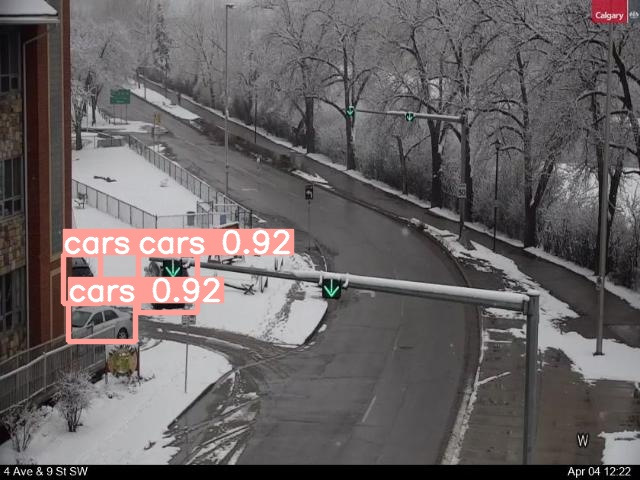

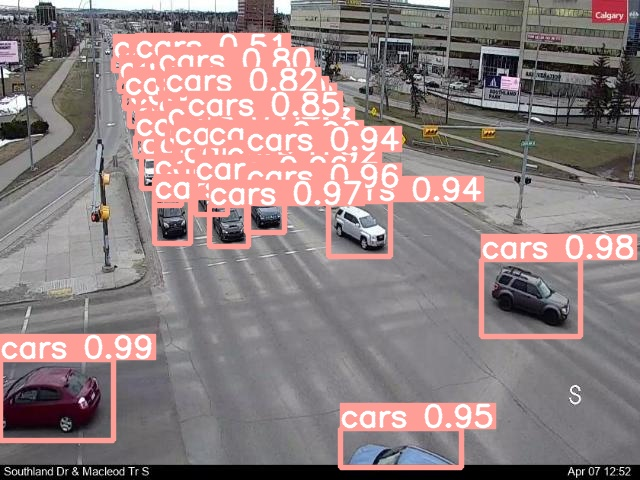

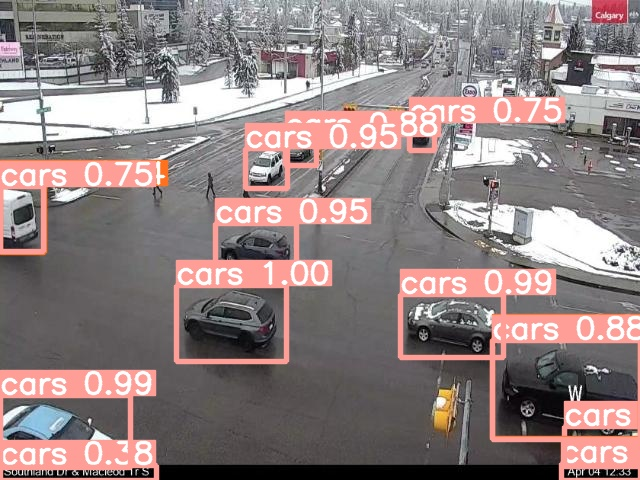

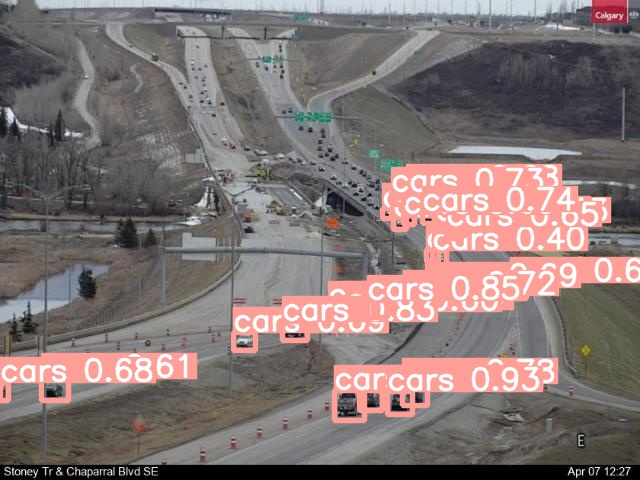

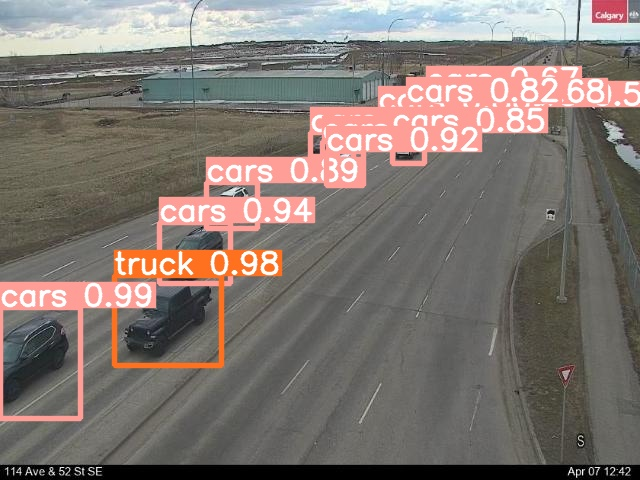

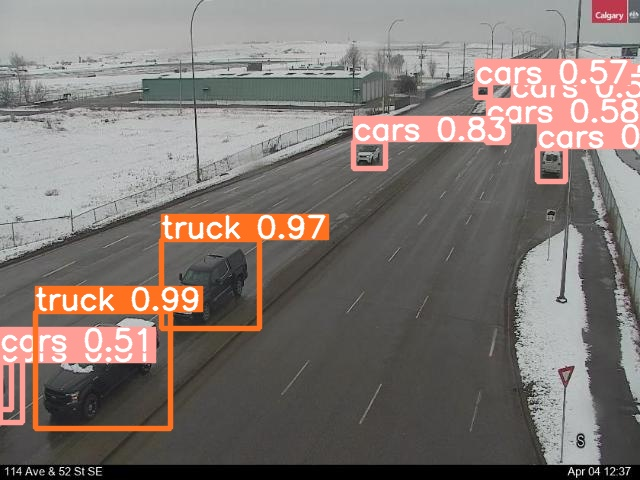

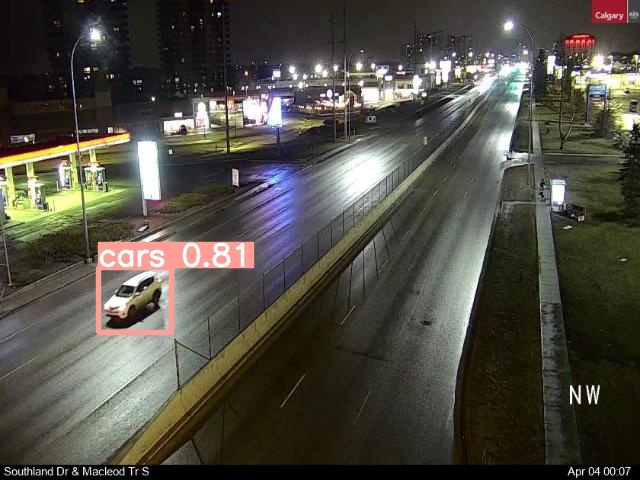

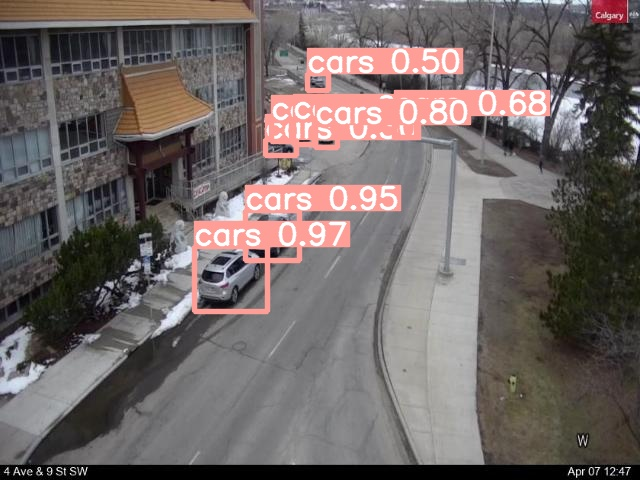

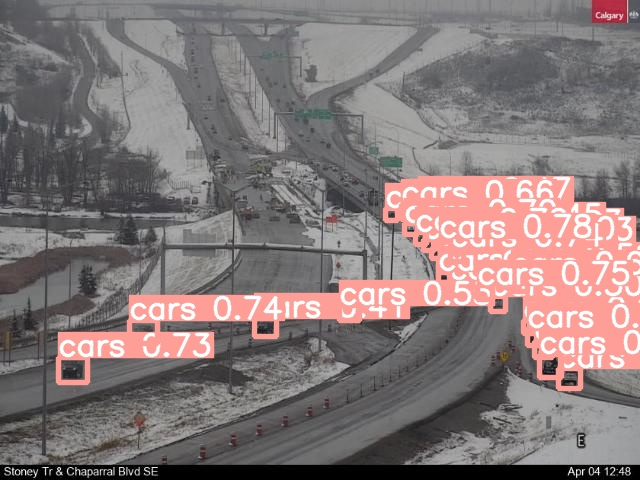

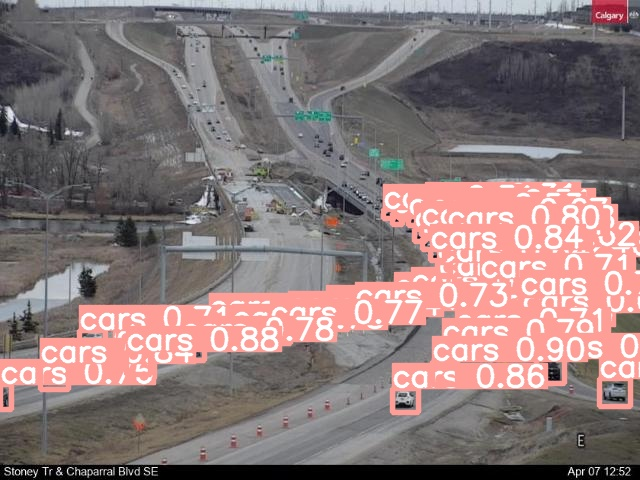

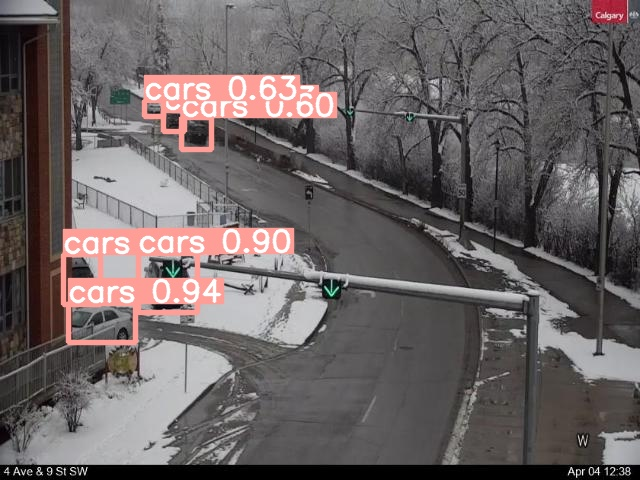

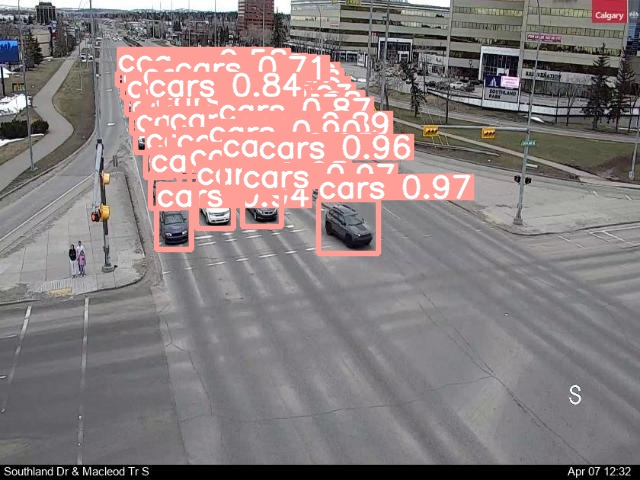

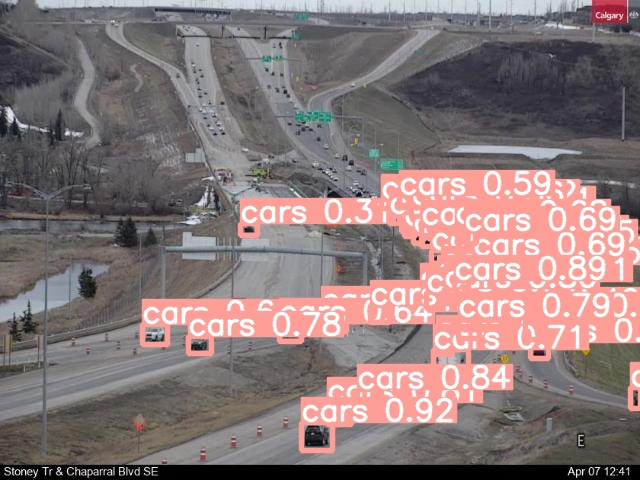

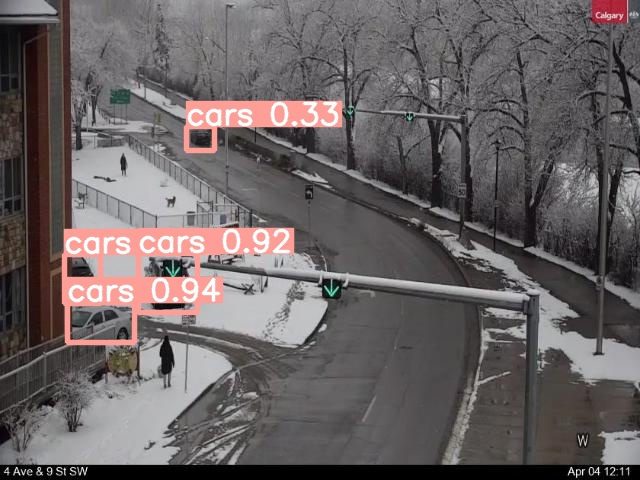

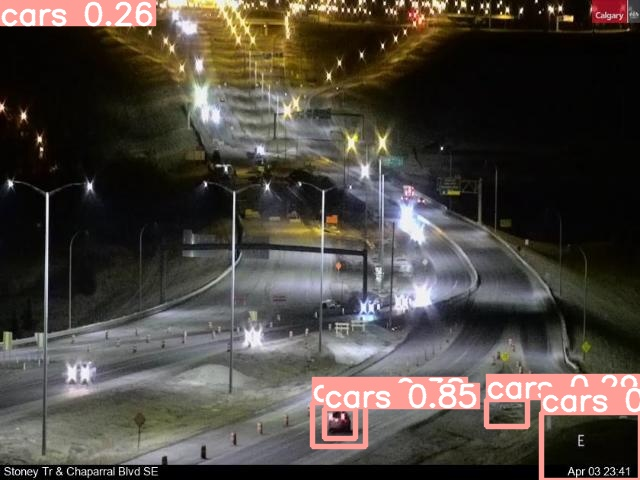

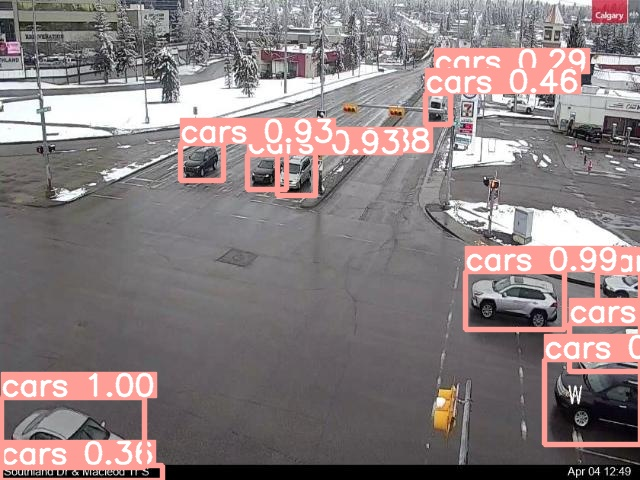

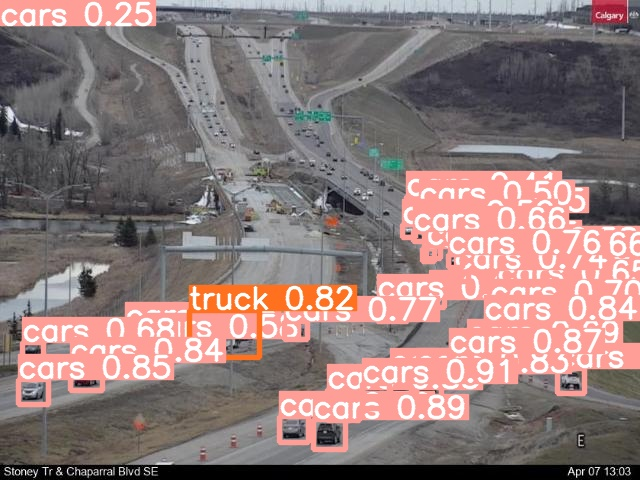

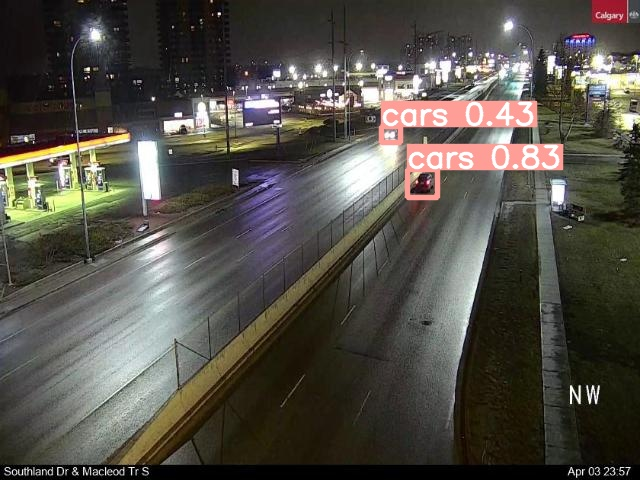

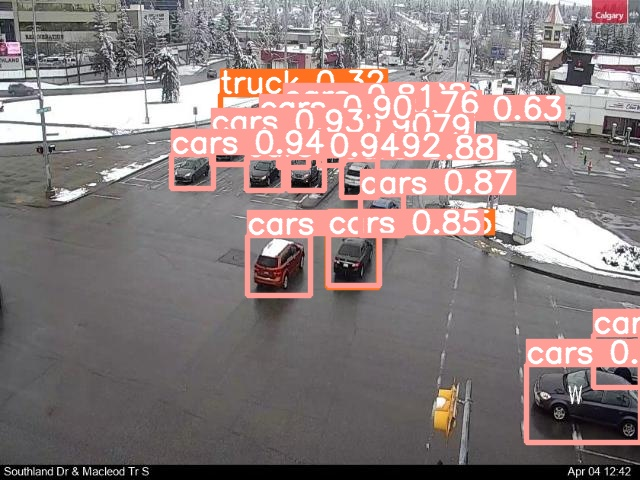

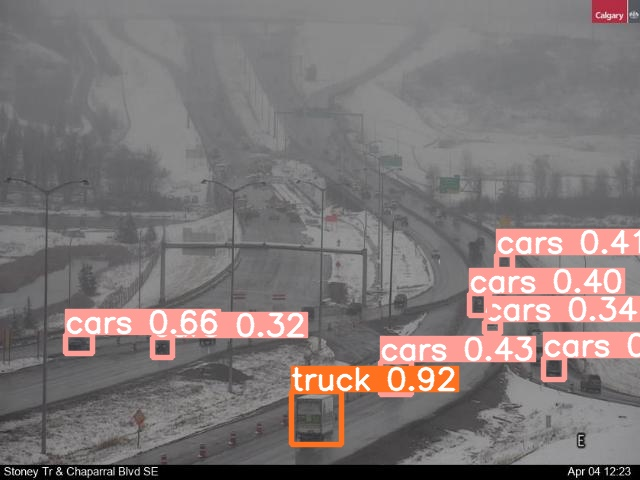

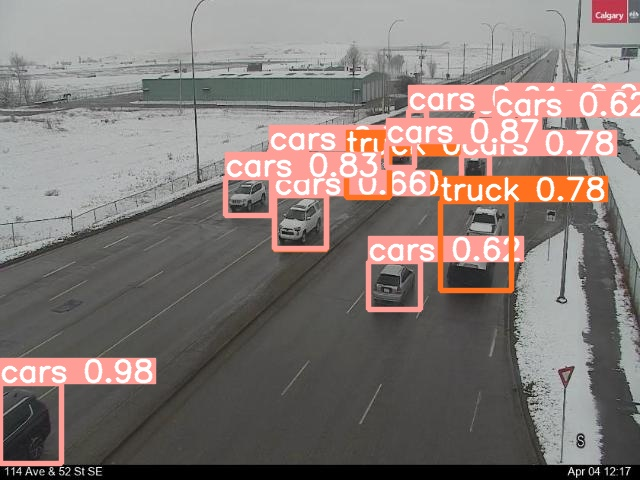

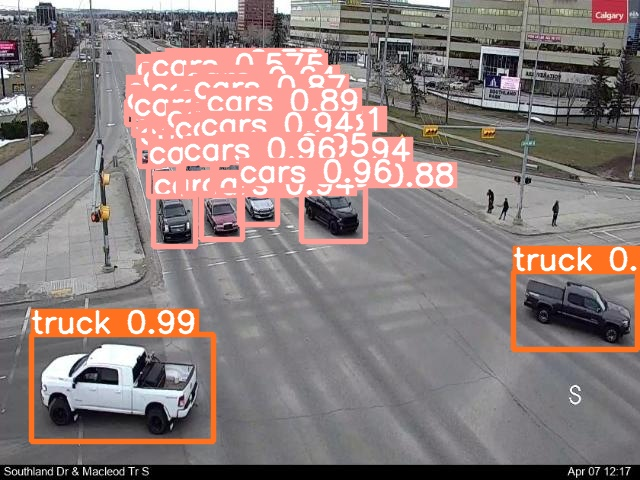

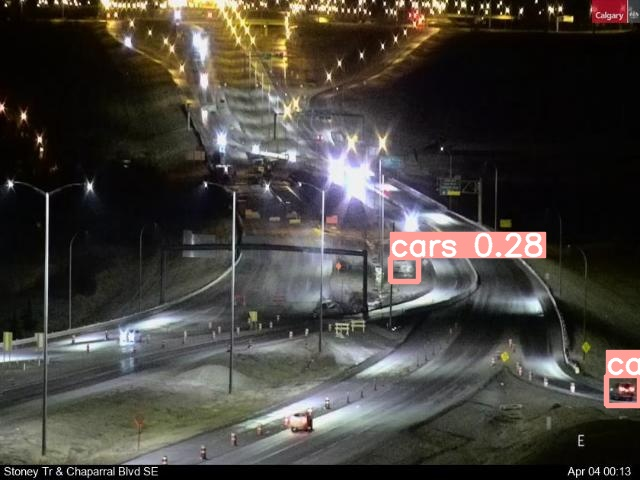

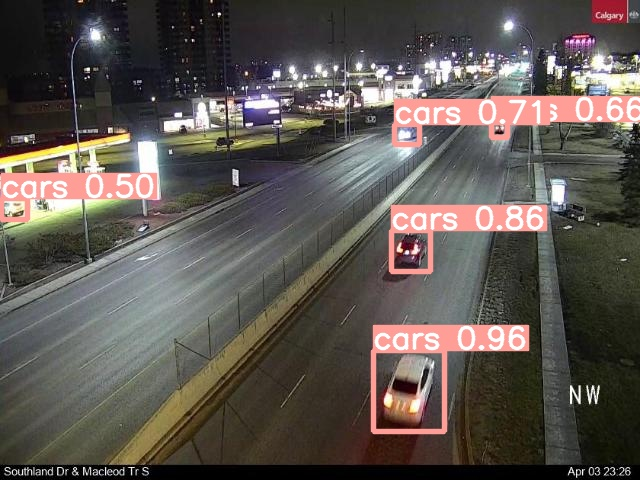

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp2/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")

Testing the model
- Running model on test data

In [ ]:
!python detect_dual.py \
--img 640 --conf 0.25 --device 0 \
--weights /content/yolov9/runs/train/exp/weights/best.pt \
--source /content/yolov9/ML-Project-1/test/images

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")

Live testing of the model
- Insert your image into "source" section and run, then the results will be saved into a folder

In [ ]:
!python detect_dual.py \
--img 640 --conf 0.1 --device 0 \
--weights /content/yolov9/runs/train/exp/weights/best.pt \
--source "/content/loc0.jpg"